# Transformación de coordenadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial
from numpy import random


In [3]:
x = np.arange(0,100)
y = np.arange(0,100)
Y, X = np.meshgrid(x,y)

In [4]:
file3 = np.loadtxt('M_10TeV_g')
file3

array([[ 1.11111e+07,  6.00000e+00,  2.10430e+05, ...,  1.00000e+00,
         3.73000e+04,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00, -2.70000e+00,  1.00000e+04, ...,  1.00000e+00,
         1.00000e+00,  3.00000e-01],
       ...,
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00]])

In [5]:
x1 = file3[:, 4]/100
y1 = file3[:, 5]/100

In [6]:
min(x1), min(y1), max(y1), max(x1)

(-5779.5, -1103.34, 20000.0, 7364.94)

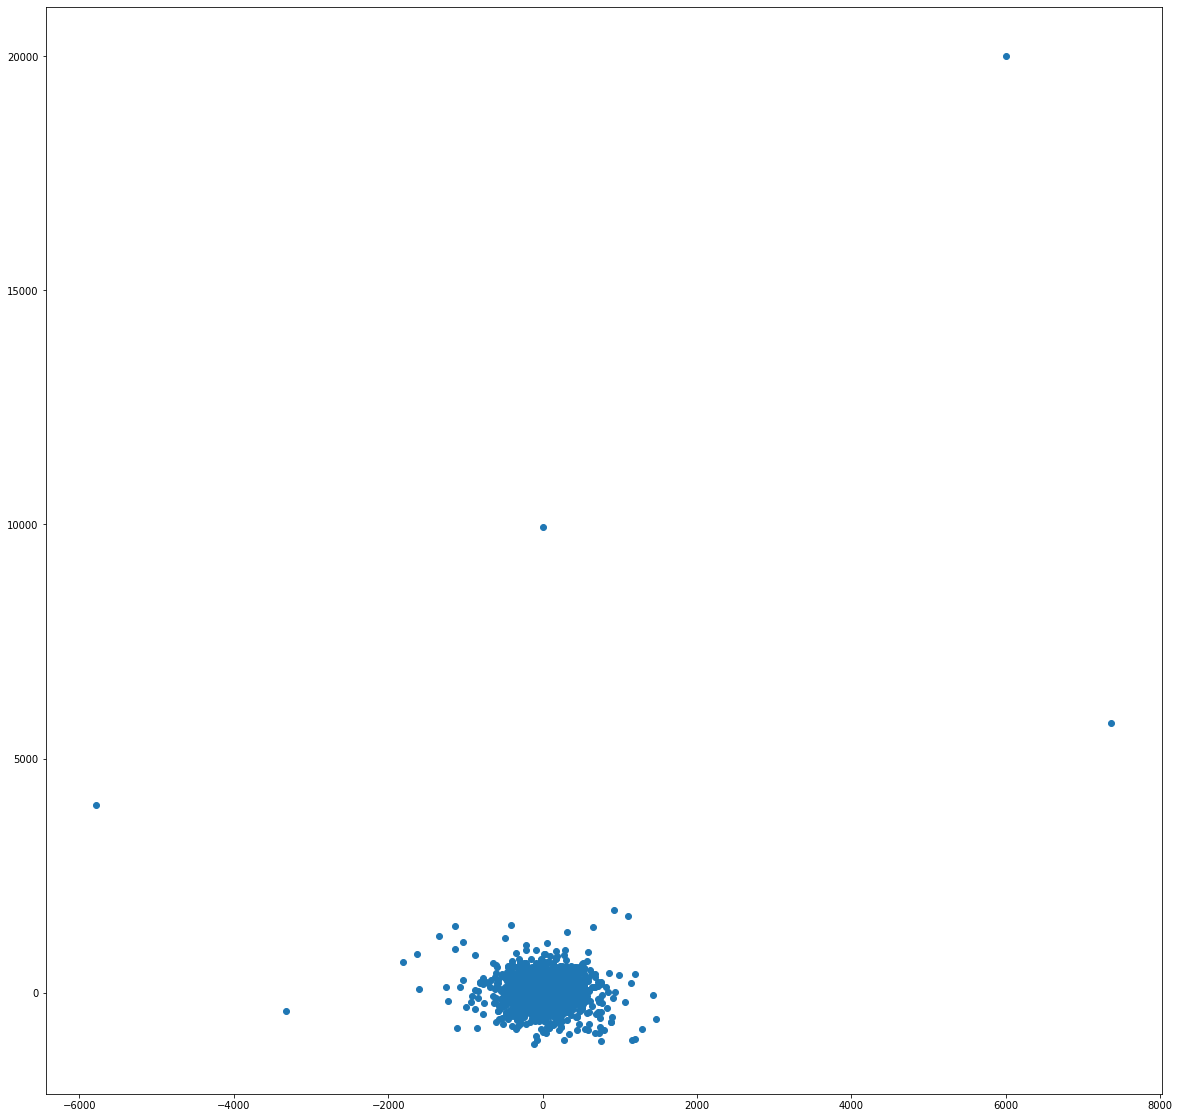

In [8]:
plt.figure(figsize=(20,20))
plt.scatter(x1, y1)
plt.show()

In [82]:
y, x = np.meshgrid(x1,y1)

In [83]:
def R(x , y, x0, y0):
    
    z = np.sqrt((x-x0)**2 + (y-y0)**2)
      
    return z

In [84]:
R = R(x , y, 0, 0)

In [86]:
R

array([[3.73000000e+02, 3.73000000e+02, 3.73000000e+02, ...,
        3.73000000e+02, 3.73000000e+02, 3.73000000e+02],
       [1.00000000e-02, 0.00000000e+00, 1.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41421356e-02, 1.00000000e-02, 1.41421356e-02, ...,
        1.00000000e-02, 1.00000000e-02, 1.00000000e-02],
       ...,
       [1.00000000e-02, 0.00000000e+00, 1.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e-02, 0.00000000e+00, 1.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e-02, 0.00000000e+00, 1.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

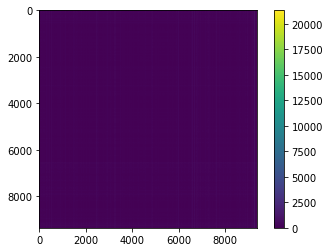

In [85]:
plt.imshow(R)
plt.colorbar()
plt.show()

## Ubicación del baricentro

In [13]:
a = np.arange(-1,2)
b = np.arange(-1,2)
t = sum(a)
t

0

In [22]:
def Bar(x,y):
    w = np.exp(-0.5*((np.sqrt(x**2 + y**2))/15)**2)
    SCorex = w*x
    SCorey = w*y
    Sum = sum(w)
    Corex = sum(SCorex)/Sum
    Corey = sum(SCorey)/Sum
    Core = [Corex,Corey]
    return Core
        
        
        

In [30]:
d = Bar(x1,y1)
d

[-0.2615213038075878, -0.33366875760465603]

## Definiendo una función de densidad

In [31]:
r = np.sqrt((x1-d[0])**2 + (y1-d[1])**2)

In [45]:
plt.plot?

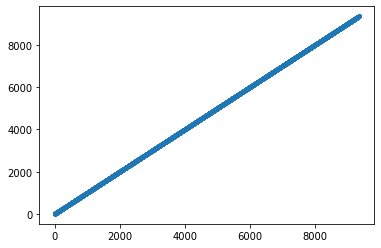

In [47]:
#plt.figure(figsize=(20,20))
plt.plot(r, '.')
plt.show()

In [32]:
def NKG(r, params):
    a = (params[0] / (2*np.pi*(params[1])**2))
    b = (gamma(4.5 - params[2]))/(gamma(params[2] - 0.5)*gamma(5 - 2*params[2]))
    c = (r/params[1])**(params[2]-2.5)
    d = (1 + r/params[1])**(params[2]-4.5)
    p = a * b * c * d
    return p

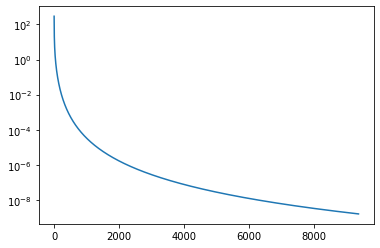

In [38]:
#params = [N_particles, r_moliere, s:age]
params = [40000, 136, 1.2]
r = np.arange(1,9360)
c = NKG(r, params)
plt.yscale('log')
plt.plot(c)
plt.show()

In [36]:
c

array([1.71562726e-03, 8.92520025e+02, 8.55209105e+02, ...,
       8.92520025e+02, 8.92520025e+02, 8.92520025e+02])

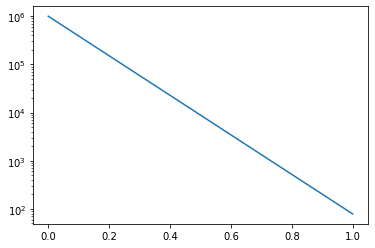

In [35]:
def NKG1(r, p):
    a = (0.4*p[0]/p[1]**2)
    b = (p[1]/r)**(0.75)
    c = (p[1]/(r+p[1]))**(3.25)
    N = a*b*c*(1 + r/(11.4*p[1]))
    return p

r1 = np.arange(1,1000)
p1 = [1e6, 79]

c1 = NKG1(r1, p1)
plt.yscale('log')
plt.plot(c1)
plt.show()

## Create a image 

In [49]:
x = np.arange(100)
y = np.arange(100)


In [50]:
Y, X = np.meshgrid(x,y)

In [ ]:
def R(x , y, x0, y0):
       
    z = np.sqrt((x-x0)**2 + (y-y0)**2)
      
    return z

In [68]:
x_0 = random.randint(25,75,10)
y_0 = random.randint(25,75,10) 


In [69]:
def rand(X,Y):
    x_0 = random.randint(25,75,10)
    y_0 = random.randint(25,75,10) 
    
    a = random.choice(x_0)
    b = random.choice(y_0)
    
    

array([61, 36, 53, 28, 46, 66, 60, 74, 63, 53])

NameError: name 'R' is not defined